In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("Dry_Bean_Dataset.csv")

In [6]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [13]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
#there are no null values , class in which we have to classify is object all other are numerical.

In [18]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

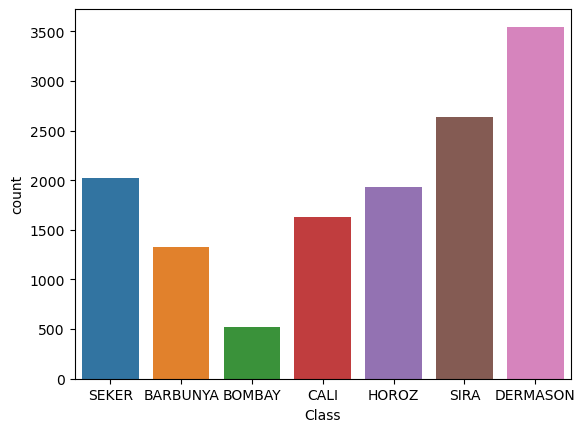

In [21]:
sns.countplot(x="Class",data=df)

In [26]:
l1=LabelEncoder()
df["Class"]=l1.fit_transform(df["Class"])

In [27]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [28]:
df["Class"].value_counts()

Class
3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

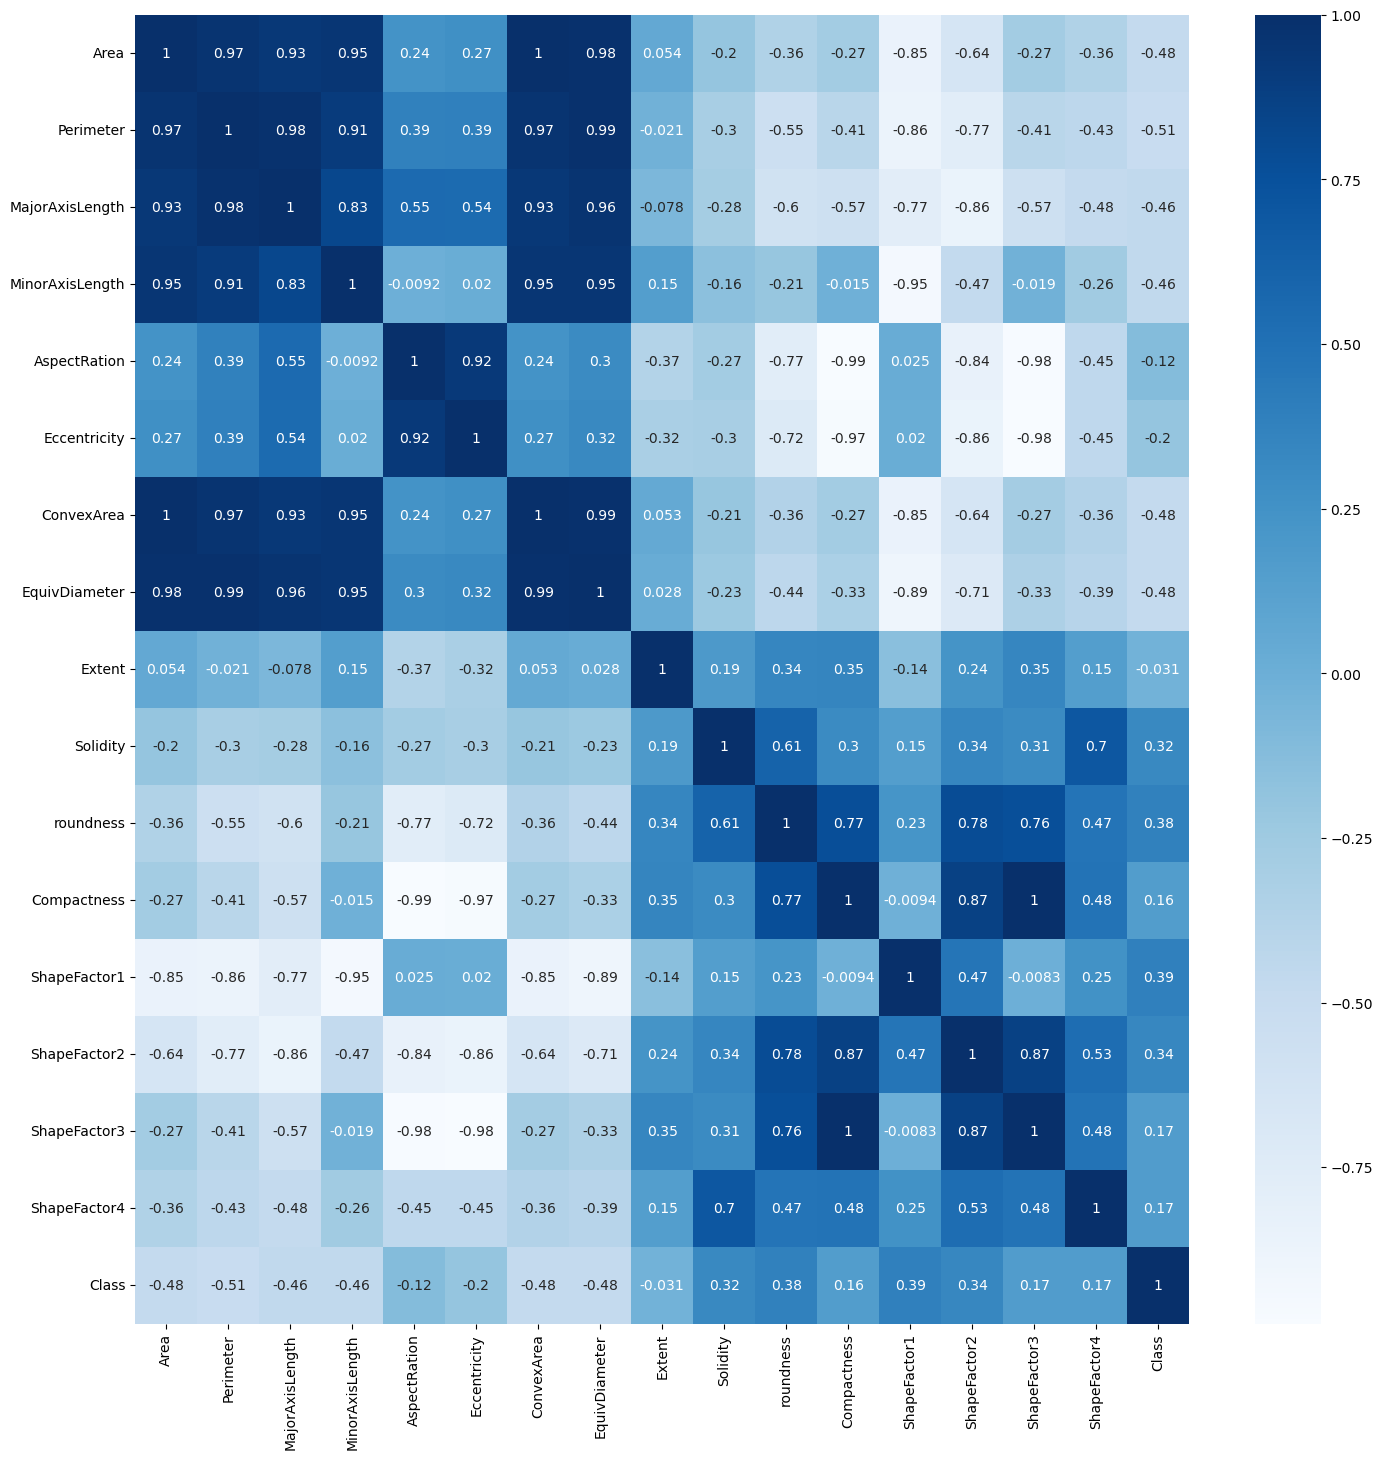

In [44]:
plt.figure(figsize=(17,17))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

In [48]:
X=df.drop(columns="Class")
Y=df["Class"]

In [49]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [52]:
Y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [56]:
vif

,VIF,variable
0,3.438622e+05,Area
1,6.044624e+04,Perimeter
2,1.314021e+06,MajorAxisLength
3,1.644595e+06,MinorAxisLength
4,1.683370e+05,AspectRation
5,2.351009e+04,Eccentricity
6,3.316840e+05,ConvexArea
7,6.074338e+06,EquivDiameter
8,2.908960e+02,Extent
9,6.265148e+05,Solidity


In [ ]:
#if accuracy is not good then later we can remove some variables to remove multicollinearity.

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [69]:
X_train.shape

(9527, 16)

In [70]:
X_test.shape

(4084, 16)

In [71]:
Y_train.shape

(9527,)

In [72]:
Y_test.shape

(4084,)

In [66]:
lr=LogisticRegression()

In [73]:
lr

LogisticRegression()

In [76]:
lr_model=lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))
print(lr.score(X_train,Y_train))

0.705435847208619
0.7068332108743571


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
#test and train accuracy is not very good.

In [79]:
Y_pred_lr=lr.predict(X_test)

In [80]:
cm_lr=confusion_matrix(Y_test,Y_pred_lr)

In [81]:
cm_lr

array([[216,   0, 116,   0,  58,   0,   5],
       [  0, 161,   0,   0,   0,   0,   0],
       [114,   0, 340,   0,  17,   5,   3],
       [  0,   0,   0, 895,   6,  61,  81],
       [  6,   0,  27,  20, 348,   8, 179],
       [  6,   0,   0, 132,   9, 390,  82],
       [  0,   0,   0,  56,  96, 116, 531]], dtype=int64)

In [82]:
# by seeing the confusion matrix prediction is not very good.

In [111]:
decision_tree=DecisionTreeClassifier(criterion="gini",max_depth=14,random_state=44)
decision_tree.fit(X_train,Y_train)
DT_score_train=decision_tree.score(X_train,Y_train)
DT_score_test=decision_tree.score(X_test,Y_test)

In [112]:
DT_score_train

0.9923375669150835

In [113]:
DT_score_test

0.8937316356513222

In [114]:
#training accuracy is good , while test accuracy is slightly down.

In [115]:
Y_pred_DT = decision_tree.predict(X_test)

In [116]:
CM_DT=confusion_matrix(Y_test,Y_pred_DT)

In [117]:
CM_DT

array([[352,   0,  27,   0,   2,   3,  11],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 30,   0, 431,   0,  11,   1,   6],
       [  1,   0,   0, 922,   5,  25,  90],
       [  6,   0,  16,   5, 545,   0,  16],
       [  5,   0,   0,  31,   0, 565,  18],
       [  4,   0,   1,  89,   9,  22, 674]], dtype=int64)

In [118]:
#accuracy has improved a lot after using decision tree ML model.

In [122]:
RFC=RandomForestClassifier(criterion="gini",max_depth=11)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=11)

In [123]:
RFC_train_score=RFC.score(X_train,Y_train)
RFC_test_score=RFC.score(X_test,Y_test)

In [125]:
RFC_train_score

0.9761729820510129

In [126]:
RFC_test_score

0.921645445641528

In [127]:
#accuracy is good.

In [128]:
Y_pred_RFC=RFC.predict(X_test)

In [129]:
CM_RFC=confusion_matrix(Y_test,Y_pred_RFC)

In [130]:
CM_RFC

array([[352,   0,  29,   0,   1,   2,  11],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 16,   0, 449,   0,   9,   2,   3],
       [  0,   0,   0, 957,   2,  18,  66],
       [  2,   0,  10,   4, 559,   0,  13],
       [  4,   0,   0,  19,   0, 581,  15],
       [  0,   0,   2,  76,   7,   9, 705]], dtype=int64)

In [132]:
GBC=GradientBoostingClassifier(n_estimators=50,max_depth=5,learning_rate=0.12,random_state=0)
GBC.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.12, max_depth=5, n_estimators=50,
                           random_state=0)

In [135]:
GBC_train_score = GBC.score(X_train,Y_train)

In [136]:
GBC_test_score = GBC.score(X_test,Y_test)

In [137]:
GBC_train_score

0.982680801931353

In [138]:
GBC_test_score

0.9255631733594515

In [139]:
Y_pred_GBC=GBC.predict(X_test)
cm_GBC=confusion_matrix(Y_test,Y_pred_GBC)

In [140]:
cm_GBC

array([[360,   0,  24,   0,   0,   2,   9],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 16,   0, 448,   0,   8,   2,   5],
       [  0,   0,   0, 960,   3,  17,  63],
       [  3,   0,   3,   4, 565,   0,  13],
       [  9,   0,   0,  17,   0, 583,  10],
       [  2,   0,   1,  78,   8,   7, 703]], dtype=int64)